%%HTML
<style>
td {
  font-size: 20px
}
table {float:left}
</style>

In [1]:
import os 
# 필요 라이브러리 로드
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform

if platform.system() == 'Windows':
# 윈도우인 경우 맑은 고딕 폰트 이용
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf"
                                           ).get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

#그래프에서 마이너스 기호가 표시되게 하는 설정입니다.
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv("시도·산업·종사자규모별_사업체수__종사자수_’06___20230427162816.csv",encoding='cp949')

In [3]:
df

,행정구역별,산업별,종사자규모별,2020,2020.1
0,행정구역별,산업별,종사자규모별,사업체수 (개),종사자수 (명)
1,전국,전체 산업,계,4325195,21583421
2,전국,전체 산업,1 - 4명,3587125,5699039
3,전국,전체 산업,5 - 9명,421489,2698584
4,전국,전체 산업,10 - 19명,170410,2255029
...,...,...,...,...,...
3068,제주,"협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",5 - 9명,210,1329
3069,제주,"협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",10 - 19명,92,1236
3070,제주,"협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",20 - 49명,47,1302
3071,제주,"협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",50 - 99명,6,387


In [4]:
df.columns=['행정구역별','산업별','종사자규모별','사업체수(개)','종사자수(명)']
df.head()

,행정구역별,산업별,종사자규모별,사업체수(개),종사자수(명)
0,행정구역별,산업별,종사자규모별,사업체수 (개),종사자수 (명)
1,전국,전체 산업,계,4325195,21583421
2,전국,전체 산업,1 - 4명,3587125,5699039
3,전국,전체 산업,5 - 9명,421489,2698584
4,전국,전체 산업,10 - 19명,170410,2255029


In [5]:
df=df.drop(0) # 0번 컬럼 버림 

In [6]:
df=df.reset_index(drop=True)


In [7]:
df=df.replace('X','0')


In [8]:
df = df.astype({'사업체수(개)':'int','종사자수(명)':'int'})
df.info()
# df.drop(columns='index',inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3072 entries, 0 to 3071
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   행정구역별    3072 non-null   object
 1   산업별      3072 non-null   object
 2   종사자규모별   3072 non-null   object
 3   사업체수(개)  3072 non-null   int32 
 4   종사자수(명)  3072 non-null   int32 
dtypes: int32(2), object(3)
memory usage: 96.1+ KB


In [9]:
'''
지역별로(전국제외 )  한  전체산업== 계 서울이 모여있는 사람이 가장 많았고  전체

지역별 지도에서 보여주면  좋을듯 

사업체 개수보다 종사자수 더 많다   
1개의 산업체마다 사람수의 평균 산업별로  종사자가 많은 산업을 알 수있다

종사자 규모별이있으니까  큰산업 대부분  어디에 분포해 있더라 



행정구역 전국 분리  지역별 
'''

'\n지역별로(전국제외 )  한  전체산업== 계 서울이 모여있는 사람이 가장 많았고  전체\n\n지역별 지도에서 보여주면  좋을듯 \n\n사업체 개수보다 종사자수 더 많다   \n1개의 산업체마다 사람수의 평균 산업별로  종사자가 많은 산업을 알 수있다\n\n종사자 규모별이있으니까  큰산업 대부분  어디에 분포해 있더라 \n\n\n\n행정구역 전국 분리  지역별 \n'

In [10]:
'''
1 .전국을 제외한 지역으로 나눈다  
2.지역별로  구분해서  전체산업의  종사자수를 확인한다  = 서울이 가장 많다 ?? 
3.산업별로  평균 종사자 확인  >> 특정산업에는 사람이 많이 몰린다  and 지역별로 발달한  산업 확인>>
그래서  이산업이 발달한 이지역에  사람이 많이 몰렸다 

'''

'\n1 .전국을 제외한 지역으로 나눈다  \n2.지역별로  구분해서  전체산업의  종사자수를 확인한다  = 서울이 가장 많다 ?? \n3.산업별로  평균 종사자 확인  >> 특정산업에는 사람이 많이 몰린다  and 지역별로 발달한  산업 확인>>\n그래서  이산업이 발달한 이지역에  사람이 많이 몰렸다 \n\n'

In [38]:
df_region=df[df['행정구역별']!='전국'] 
df_region

,행정구역별,산업별,종사자규모별,사업체수(개),종사자수(명)
196,서울,전체 산업,계,848552,5044552
197,서울,전체 산업,1 - 4명,695308,1111999
198,서울,전체 산업,5 - 9명,87139,556577
199,서울,전체 산업,10 - 19명,36141,473817
200,서울,전체 산업,20 - 49명,18015,534167
...,...,...,...,...,...
3067,제주,"협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",5 - 9명,210,1329
3068,제주,"협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",10 - 19명,92,1236
3069,제주,"협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",20 - 49명,47,1302
3070,제주,"협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",50 - 99명,6,387


In [39]:
df_region_sum=df_region[df_region['종사자규모별']=='계']
df_region_sum
### df_region_sum  지역별 산업별 전체 산업   /  지역 산업별 


,행정구역별,산업별,종사자규모별,사업체수(개),종사자수(명)
196,서울,전체 산업,계,848552,5044552
206,서울,"농업, 임업 및 어업(01~03)",계,64,532
212,서울,광업(05~08),계,11,58
216,서울,제조업(10~34),계,58865,245843
226,서울,"전기, 가스, 증기 및 공기조절 공급업(35)",계,212,6020
...,...,...,...,...,...
3028,제주,"공공행정, 국방 및 사회보장 행정(84)",계,209,15385
3037,제주,교육 서비스업(85),계,2842,20908
3046,제주,보건업 및 사회복지 서비스업(86~87),계,2019,26991
3056,제주,"예술, 스포츠 및 여가관련 서비스업(90~91)",계,1998,10446


In [37]:
df_region_all=df_region_sum[df_region_sum['산업별']=='전체 산업']# 지역별 산업별 전체 산업


,행정구역별,산업별,종사자규모별,사업체수(개),종사자수(명)
196,서울,전체 산업,계,848552,5044552
381,부산,전체 산업,계,298386,1364302
560,대구,전체 산업,계,214909,893590
727,인천,전체 산업,계,216249,1051036
902,광주,전체 산업,계,125295,582380
1067,대전,전체 산업,계,123728,618248
1235,울산,전체 산업,계,89907,493599
1399,세종,전체 산업,계,19821,122236
1551,경기,전체 산업,계,989105,5028507
1737,강원,전체 산업,계,150422,627833


In [41]:
df_region_industry=df_region_sum[df_region_sum['산업별']!='전체 산업']  ## 지역별 산업
df_region_industry


,행정구역별,산업별,종사자규모별,사업체수(개),종사자수(명)
206,서울,"농업, 임업 및 어업(01~03)",계,64,532
212,서울,광업(05~08),계,11,58
216,서울,제조업(10~34),계,58865,245843
226,서울,"전기, 가스, 증기 및 공기조절 공급업(35)",계,212,6020
234,서울,"수도, 하수 및 폐기물 처리, 원료 재생업(36~39)",계,498,9309
...,...,...,...,...,...
3028,제주,"공공행정, 국방 및 사회보장 행정(84)",계,209,15385
3037,제주,교육 서비스업(85),계,2842,20908
3046,제주,보건업 및 사회복지 서비스업(86~87),계,2019,26991
3056,제주,"예술, 스포츠 및 여가관련 서비스업(90~91)",계,1998,10446


,행정구역별,산업별,종사자규모별,사업체수(개),종사자수(명)
196,서울,전체 산업,계,848552,5044552
381,부산,전체 산업,계,298386,1364302
560,대구,전체 산업,계,214909,893590
727,인천,전체 산업,계,216249,1051036
902,광주,전체 산업,계,125295,582380
1067,대전,전체 산업,계,123728,618248
1235,울산,전체 산업,계,89907,493599
1399,세종,전체 산업,계,19821,122236
1551,경기,전체 산업,계,989105,5028507
1737,강원,전체 산업,계,150422,627833


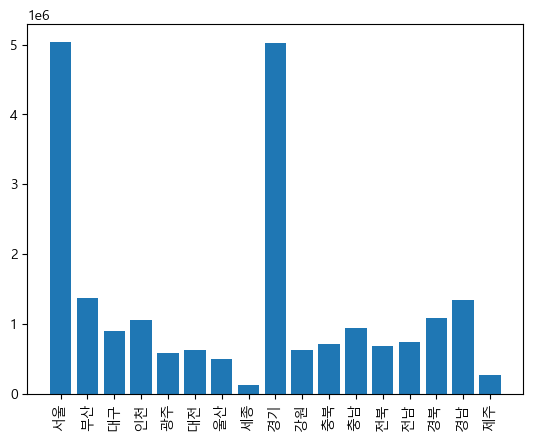

In [16]:
fig, ax =plt.subplots()
ax.bar('행정구역별','종사자수(명)',data=df_region_all)
plt.xticks(rotation=90)
plt.show() ## 서울 경기  사람이 가장 많이 분포해 있다 

In [47]:
#323 rows × 5 columns
df_region_industry[df_region_industry['종사자규모별']=='계']

,행정구역별,산업별,종사자규모별,사업체수(개),종사자수(명)
206,서울,"농업, 임업 및 어업(01~03)",계,64,532
212,서울,광업(05~08),계,11,58
216,서울,제조업(10~34),계,58865,245843
226,서울,"전기, 가스, 증기 및 공기조절 공급업(35)",계,212,6020
234,서울,"수도, 하수 및 폐기물 처리, 원료 재생업(36~39)",계,498,9309
...,...,...,...,...,...
3028,제주,"공공행정, 국방 및 사회보장 행정(84)",계,209,15385
3037,제주,교육 서비스업(85),계,2842,20908
3046,제주,보건업 및 사회복지 서비스업(86~87),계,2019,26991
3056,제주,"예술, 스포츠 및 여가관련 서비스업(90~91)",계,1998,10446


In [46]:
# df_region_industry['종사자수(명)'].sum()
df_region_industry[df_region_industry['산업별']=='제조업(10~34)'].sum()

행정구역별                     서울부산대구인천광주대전울산세종경기강원충북충남전북전남경북경남제주
산업별        제조업(10~34)제조업(10~34)제조업(10~34)제조업(10~34)제조업(10...
종사자규모별                                     계계계계계계계계계계계계계계계계계
사업체수(개)                                               453257
종사자수(명)                                              3984905
dtype: object

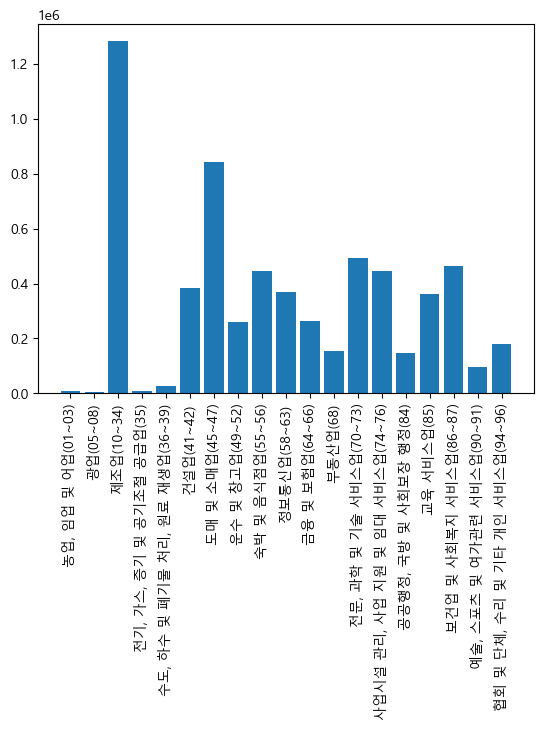

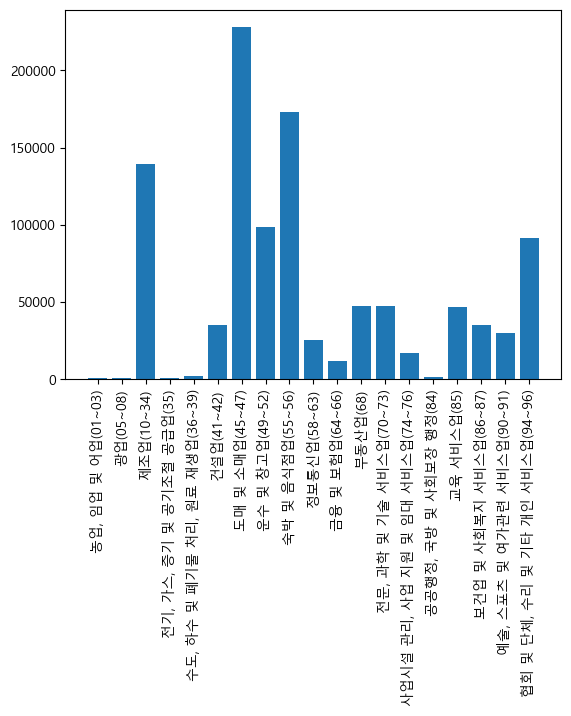

In [51]:
fig, ax =plt.subplots()
ax.bar('산업별','종사자수(명)',data=df_region_industry)
plt.xticks(rotation=90)
plt.show() ## 산업 종사자수는  전반적으로   제조업에 집중되어 있습니다  
            ##자료가 이상하게 나옴 
fig, ax =plt.subplots()
ax.bar('산업별','사업체수(개)',data=df_region_industry)
plt.xticks(rotation=90)
plt.show()

In [48]:
df_region_industry.info()
# fig, ax =plt.subplots()
# ax.bar('산업별','사업체수(개)',data=df_region_industry)
# plt.xticks(rotation=90)
# plt.show() ##  산업체 개수 산업별

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323 entries, 206 to 3065
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   행정구역별    323 non-null    object
 1   산업별      323 non-null    object
 2   종사자규모별   323 non-null    object
 3   사업체수(개)  323 non-null    int32 
 4   종사자수(명)  323 non-null    int32 
dtypes: int32(2), object(3)
memory usage: 12.6+ KB


In [21]:
df_region_industry['행정구역별'].unique()

array(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북',
       '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [22]:
df_seoul=df_region_industry[df_region_industry['행정구역별']=='서울']
df_busan=df_region_industry[df_region_industry['행정구역별']=='부산']
df_daegu=df_region_industry[df_region_industry['행정구역별']=='대구']
df_Incheon=df_region_industry[df_region_industry['행정구역별']=='인천']
df_gwangju=df_region_industry[df_region_industry['행정구역별']=='광주']
df_Daejeon=df_region_industry[df_region_industry['행정구역별']=='대전']
df_Ulsan=df_region_industry[df_region_industry['행정구역별']=='울산']
df_Sejong=df_region_industry[df_region_industry['행정구역별']=='세종']
df_gyeonggi=df_region_industry[df_region_industry['행정구역별']=='경기']
df_Gangwon=df_region_industry[df_region_industry['행정구역별']=='강원']
df_Chungbuk=df_region_industry[df_region_industry['행정구역별']=='충북']
df_Chungnam=df_region_industry[df_region_industry['행정구역별']=='충남']
df_Jeonbuk=df_region_industry[df_region_industry['행정구역별']=='전북']
df_Gyeongbuk=df_region_industry[df_region_industry['행정구역별']=='경북']
df_Gyeongnam=df_region_industry[df_region_industry['행정구역별']=='경남']
df_jeju=df_region_industry[df_region_industry['행정구역별']=='제주']


,행정구역별,산업별,종사자규모별,사업체수(개),종사자수(명)
2917,제주,"농업, 임업 및 어업(01~03)",계,400,2971
2924,제주,광업(05~08),계,10,186
2930,제주,제조업(10~34),계,2703,11992
2938,제주,"전기, 가스, 증기 및 공기조절 공급업(35)",계,58,1097
2945,제주,"수도, 하수 및 폐기물 처리, 원료 재생업(36~39)",계,120,1165
2952,제주,건설업(41~42),계,2709,19441
2961,제주,도매 및 소매업(45~47),계,15561,40803
2968,제주,운수 및 창고업(49~52),계,6325,14862
2976,제주,숙박 및 음식점업(55~56),계,21083,52660
2985,제주,정보통신업(58~63),계,407,5278


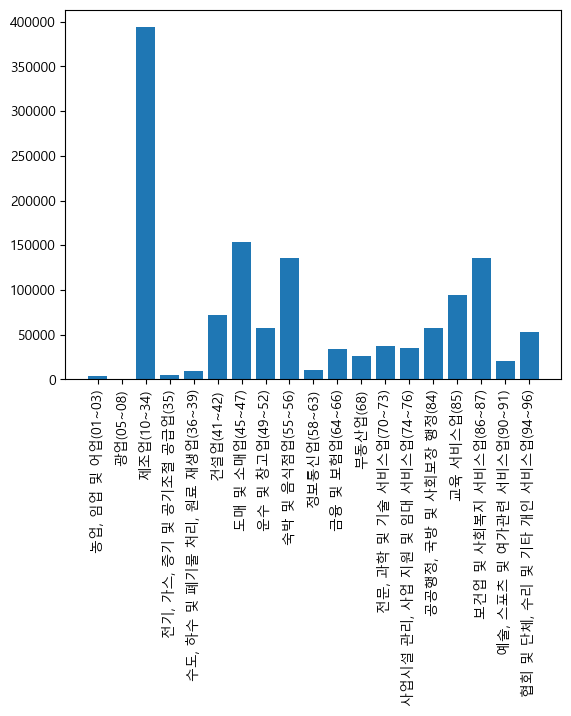

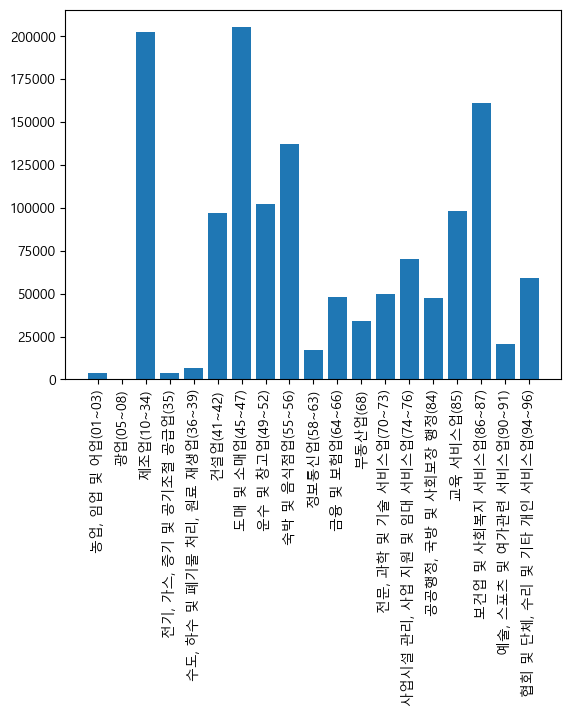

In [50]:
# df_jeju
#df_region_industry.columns
fig, ax =plt.subplots()
ax.bar('산업별','종사자수(명)',data=df_Gyeongnam)
plt.xticks(rotation=90)
plt.show() ##  산업체 개수 산업별
## 예상으로  제조업  큰 업체가 많거나 그래서 제조업 종사자가 자장 많다 
## 고령화 ~~~  설명  보건복지 서비스업의  증가 량을 보면 된다 
fig, ax =plt.subplots()
ax.bar('산업별','종사자수(명)',data=df_busan)
plt.xticks(rotation=90)
plt.show()            

In [52]:
df_region_industry.columns

Index(['행정구역별', '산업별', '종사자규모별', '사업체수(개)', '종사자수(명)'], dtype='object')

In [57]:
df_region_industry

,행정구역별,산업별,종사자규모별,사업체수(개),종사자수(명)
206,서울,"농업, 임업 및 어업(01~03)",계,64,532
212,서울,광업(05~08),계,11,58
216,서울,제조업(10~34),계,58865,245843
226,서울,"전기, 가스, 증기 및 공기조절 공급업(35)",계,212,6020
234,서울,"수도, 하수 및 폐기물 처리, 원료 재생업(36~39)",계,498,9309
...,...,...,...,...,...
3028,제주,"공공행정, 국방 및 사회보장 행정(84)",계,209,15385
3037,제주,교육 서비스업(85),계,2842,20908
3046,제주,보건업 및 사회복지 서비스업(86~87),계,2019,26991
3056,제주,"예술, 스포츠 및 여가관련 서비스업(90~91)",계,1998,10446


In [59]:
df_region_industry['종사자비율']=df_region_industry['종사자수(명)']//df_region_industry['사업체수(개)']
df_region_industry

C:\Users\song\AppData\Local\Temp\ipykernel_2900\3590034670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region_industry['종사자비율']=df_region_industry['종사자수(명)']//df_region_industry['사업체수(개)']


,행정구역별,산업별,종사자규모별,사업체수(개),종사자수(명),종사자비율
206,서울,"농업, 임업 및 어업(01~03)",계,64,532,8
212,서울,광업(05~08),계,11,58,5
216,서울,제조업(10~34),계,58865,245843,4
226,서울,"전기, 가스, 증기 및 공기조절 공급업(35)",계,212,6020,28
234,서울,"수도, 하수 및 폐기물 처리, 원료 재생업(36~39)",계,498,9309,18
...,...,...,...,...,...,...
3028,제주,"공공행정, 국방 및 사회보장 행정(84)",계,209,15385,73
3037,제주,교육 서비스업(85),계,2842,20908,7
3046,제주,보건업 및 사회복지 서비스업(86~87),계,2019,26991,13
3056,제주,"예술, 스포츠 및 여가관련 서비스업(90~91)",계,1998,10446,5


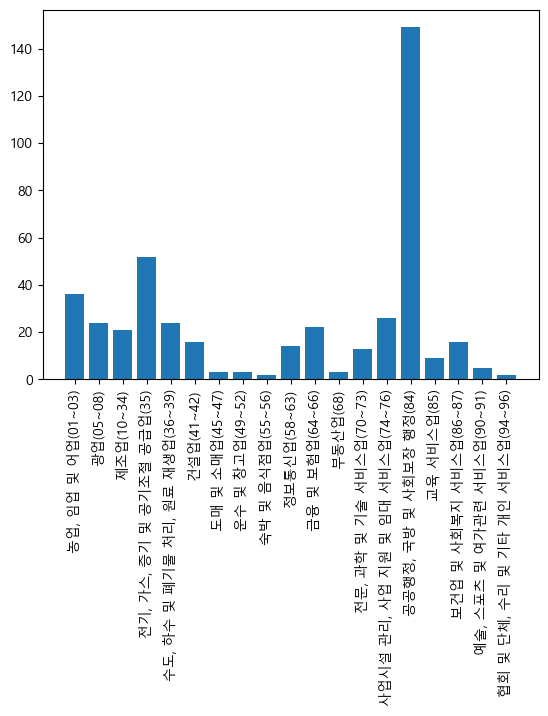

In [61]:
fig, ax =plt.subplots()
ax.bar('산업별','종사자비율',data=df_region_industry)
plt.xticks(rotation=90)
plt.show()

In [63]:
df_region_industry['행정구역별'].unique()

array(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북',
       '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)